Loading dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Load Data

In [17]:
#Load the dataset by replacing with the appropriate string, dataset will be uploaded on Moodle as well
raw_mail_data = pd.read_csv('/content/mail_data.csv')
data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')
print(data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


Data Exploration

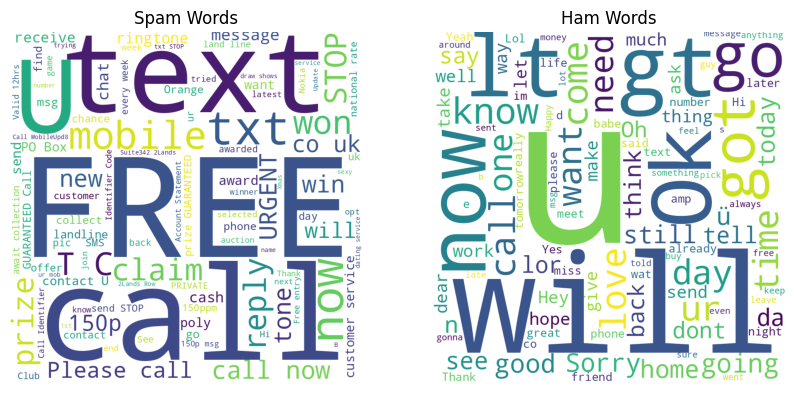

In [ ]:
import pandas as pd
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('/content/mail_data.csv')

# Separate the spam and non-spam messages
spam_messages = df[df["Category"] == "spam"]["Message"]
non_spam_messages = df[df["Category"] == "ham"]["Message"]

# Create a WordCloud object for the spam messages
spam_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
spam_wordcloud.generate(' '.join(spam_messages))

# Create a WordCloud object for the non-spam messages
non_spam_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
non_spam_wordcloud.generate(' '.join(non_spam_messages))

# Display the WordClouds
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first word cloud in the left subplot
ax1.imshow(spam_wordcloud)
ax1.set_title("Spam Words")
ax1.axis("off")

# Plot the second word cloud in the right subplot
ax2.imshow(non_spam_wordcloud)
ax2.set_title("Ham Words")
ax2.axis("off")

# Display the figure
plt.show()

Train, Test, Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], random_state=3)

# Convert the messages into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

Training the models

In [ ]:
# Train a logistic regression classifier on the training set

log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train_counts, y_train)

# Train a naive Bayes classifier on the training set
NB_model = MultinomialNB()
NB_model.fit(X_train_counts, y_train)

# Train a SVM classifier on the training set
SVM_model = SVC()
SVM_model.fit(X_train_counts, y_train)

# Make predictions on the testing set
y_pred_1 = log_model.predict(X_test_counts)
y_pred_2 = NB_model.predict(X_test_counts)
y_pred_3 = SVM_model.predict(X_test_counts)

# Evaluate the performance of the classifier
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_1))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_1))

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_2))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_2))

print("SVM Accuracy:", accuracy_score(y_test, y_pred_3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_3))

Logistic Regression Accuracy: 0.9784637473079684
Confusion matrix:
 [[1194    3]
 [  27  169]]
Naive Bayes Accuracy: 0.9877961234745154
Confusion matrix:
 [[1194    3]
 [  14  182]]
SVM Accuracy: 0.9777458722182341
Confusion matrix:
 [[1197    0]
 [  31  165]]


Testing the models

In [ ]:
text_input = input("Enter an input email\n")

choice_input= input("To test the Logistic model, enter 1 \n To test the Naive Bayes model, enter 2 \n To test the SVM model, enter 3\n")

# Convert the text input into a matrix of token counts
text_input_counts = vectorizer.transform([text_input])

# Make a prediction

if choice_input == "1":
  prediction = log_model.predict(text_input_counts)
elif choice_input == "2":
  prediction = NB_model.predict(text_input_counts)
elif choice_input == "3":
  prediction = SVM_model.predict(text_input_counts)
else:
  print("Wrong input")

# Print the prediction
if prediction[0] == 'spam':
    print("This is a spam message.")
else:
    print("This is a ham message.")